In [1]:
import sys
sys.path.insert(0, '../')
from bibliotecas import base_estudantes, job, magalu, alunos, petrobras, sns, np, pd, plt, yf, px, go, sp, wn, quandl, date, db, geobr, gpd, os
wn.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./novo.csv', sep=',')

In [3]:
df

,Ano,UF,Codigo,Descricao,FOB,Kg,Cod_UF
0,2022,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",15897695648,24680218065,RJ
1,2022,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",11523334576,20128148797,MT
2,2022,Pará,26,"Minerios, escórias e cinzas",7087616732,71546686852,PA
3,2022,Minas Gerais,26,"Minerios, escórias e cinzas",6726245081,69826536923,MG
4,2022,São Paulo,27,"Combustíveis minerais, óleos minerais e produt...",4945517507,6868575187,SP
...,...,...,...,...,...,...,...
45732,1997,Maranhão,96,Obras diversas,11,0,MA
45733,1997,Santa Catarina,37,Produtos para fotografia e cinematografia,9,49,SC
45734,1997,Santa Catarina,45,Cortiça e suas obras,9,30,SC
45735,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9,1,CE


<AxesSubplot:xlabel='Codigo'>

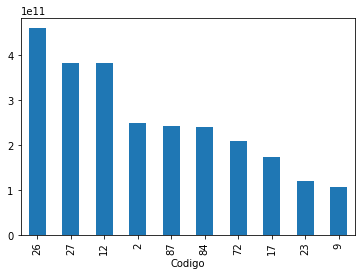

In [4]:
df.groupby('Codigo')['FOB'].sum().sort_values(ascending=False)[:10].plot(kind='bar') #10 produtos mais exportados

<AxesSubplot:xlabel='Cod_UF'>

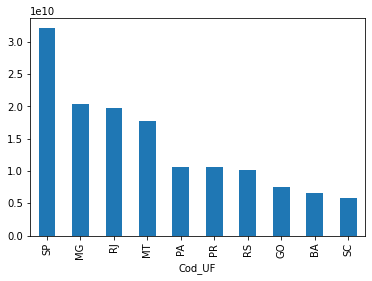

In [5]:
df.query('Ano==2022').groupby('Cod_UF')['FOB'].sum().sort_values(ascending=False)[:10].plot(kind='bar')

In [6]:
# market share (parcela de mercado) -> percent UF sobre BR
mkt = df.groupby('Cod_UF')['FOB'].sum().sort_values()
mktdf = pd.DataFrame(mkt).reset_index()
mktdf

,Cod_UF,FOB
0,AC,420233626
1,RR,1115212928
2,SE,1857635447
3,DF,3507699826
4,PB,3978335650
5,AP,5351723561
6,PI,6226960276
7,RN,7689883342
8,TO,13939690229
9,AL,14612565923


In [7]:
mktdf['MKT'] = (mktdf['FOB'] /mktdf['FOB'].sum())*100
mktdf['MKT'] = mktdf['MKT'].round(2)

In [8]:
mktdf

,Cod_UF,FOB,MKT
0,AC,420233626,0.01
1,RR,1115212928,0.03
2,SE,1857635447,0.05
3,DF,3507699826,0.09
4,PB,3978335650,0.10
5,AP,5351723561,0.13
6,PI,6226960276,0.15
7,RN,7689883342,0.19
8,TO,13939690229,0.35
9,AL,14612565923,0.36


<AxesSubplot:xlabel='Cod_UF', ylabel='MKT'>

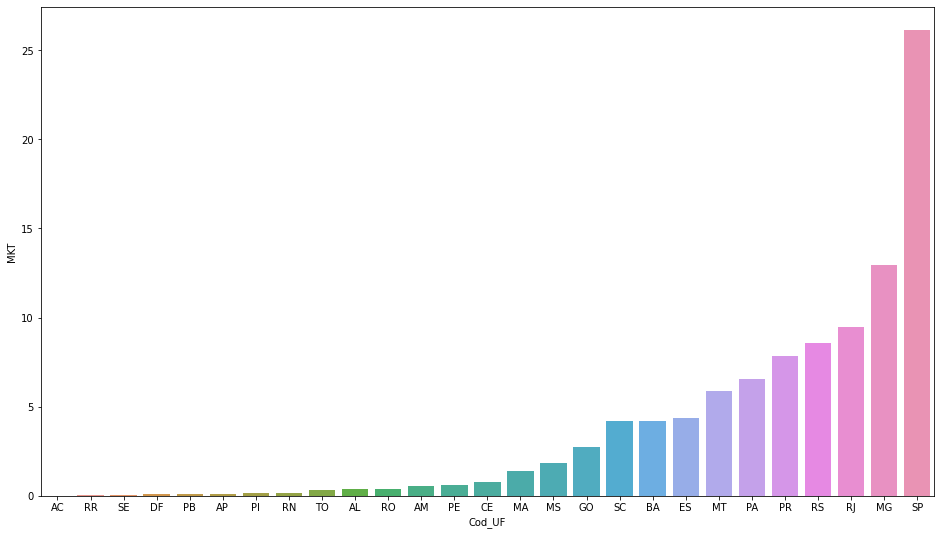

In [9]:
plt.figure(figsize=(16,9))
sns.barplot(data=mktdf, x='Cod_UF', y='MKT')

In [10]:
estado = geobr.read_state(year=2020)

In [11]:
estado.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


(-76.24759047175, -26.590499411249997, -35.70232894755, 7.22299203055)

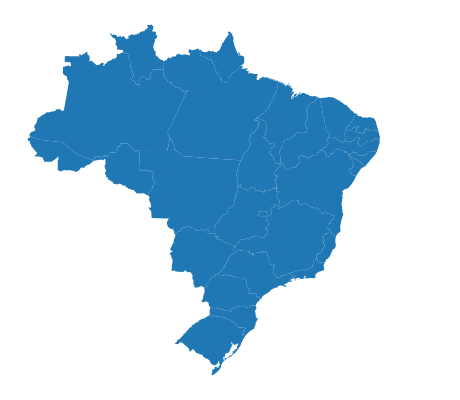

In [12]:
f,a = plt.subplots(figsize=(8,8))
estado.plot(ax=a)
a.axis('off')

In [13]:
br = pd.merge(estado, mktdf, left_on='abbrev_state', right_on='Cod_UF')

In [14]:
br

,code_state,abbrev_state,name_state,code_region,name_region,geometry,Cod_UF,FOB,MKT
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...",RO,16289914131,0.41
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",AC,420233626,0.01
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",AM,23326955069,0.58
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...",RR,1115212928,0.03
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",PA,263970069154,6.57
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",AP,5351723561,0.13
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ...",TO,13939690229,0.35
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...",MA,55758419373,1.39
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ...",PI,6226960276,0.15
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...",CE,31438706817,0.78


Text(0.5, 1.0, 'maiores market share de todos anos')

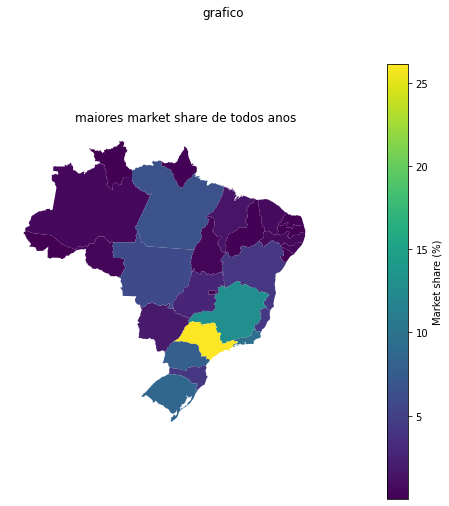

In [16]:
f,a = plt.subplots(figsize=(8,8))
plt.suptitle('grafico')
br.plot(ax=a, column='MKT', legend=True, legend_kwds={'label':'Market share (%)'})
a.axis('off')
a.set_title('maiores market share de todos anos')

In [89]:
df.query('Cod_UF == "SP"').groupby('Descricao')['FOB'].sum().sort_values(ascending=False)[:10]

Descricao
Veículos automóveis, tratores, ciclos e outros veículos terrestres, suas partes e acessórios                                                                                                                    128082583494
Reatores nucleares, caldeiras, máquinas, aparelhos e instrumentos mecânicos, e suas partes                                                                                                                      127567916572
Açúcares e produtos de confeitaria                                                                                                                                                                              111338964011
Aeronaves e aparelhos espaciais, e suas partes                                                                                                                                                                   82187144983
Máquinas, aparelhos e materiais elétricos, e suas partes; aparelhos de gravação ou de reprodução de som, a

In [94]:
mktdf

,Cod_UF,FOB,MKT
0,AC,420233626,0.01
1,RR,1115212928,0.03
2,SE,1857635447,0.05
3,DF,3507699826,0.09
4,PB,3978335650,0.10
5,AP,5351723561,0.13
6,PI,6226960276,0.15
7,RN,7689883342,0.19
8,TO,13939690229,0.35
9,AL,14612565923,0.36


In [111]:
px.bar(mktdf, y='MKT', x='Cod_UF', hover_name='MKT', hover_data={'MKT':False, 'Cod_UF':False})

In [115]:
c={}
for i in mktdf.columns:
    c[i] = False
c

{'Cod_UF': False, 'FOB': False, 'MKT': False}

In [116]:
px.bar(mktdf, y='MKT', x='Cod_UF', hover_name='MKT', hover_data=c)